HuggingFaceM4/idefics2-8b

HuggingFaceM4/idefics2-8b-AWQ


## Importing required libraries

In [ ]:
import requests
import torch
import time
from PIL import Image
from io import BytesIO

from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image
from transformers import BitsAndBytesConfig
from transformers import AwqConfig

## Installing dependancies

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-h_1bqqku
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-h_1bqqku
  Resolved https://github.com/huggingface/transformers.git to commit 8c12690cecbb97e187861e386f7a0ac790e4236c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install accelerate

In [ ]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/


## Quatization config

---



1.   BitsAndBytes
2.   AWQ



In [ ]:
# quantization_config = AwqConfig(
#     bits=4,
#     fuse_max_seq_len=4096,
#     modules_to_fuse={
#         "attention": ["q_proj", "k_proj", "v_proj", "o_proj"],
#         "mlp": ["gate_proj", "up_proj", "down_proj"],
#         "layernorm": ["input_layernorm", "post_attention_layernorm", "norm"],
#         "use_alibi": False,
#         "num_attention_heads": 32,
#         "num_key_value_heads": 8,
#         "hidden_size": 4096,
#      }
# )

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceM4/idefics2-8b",
    torch_dtype=torch.float16,
    quantization_config=quantization_config
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.64G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

In [ ]:
processor = AutoProcessor.from_pretrained(
    "HuggingFaceM4/idefics2-8b",
    do_image_splitting=False
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Loading the image

In [ ]:
# Note that passing the image urls (instead of the actual pil images) to the processor is also possible
image1 = load_image("https://csmvs.in/wp-content/uploads/2024/04/L-82.2-106.jpg")


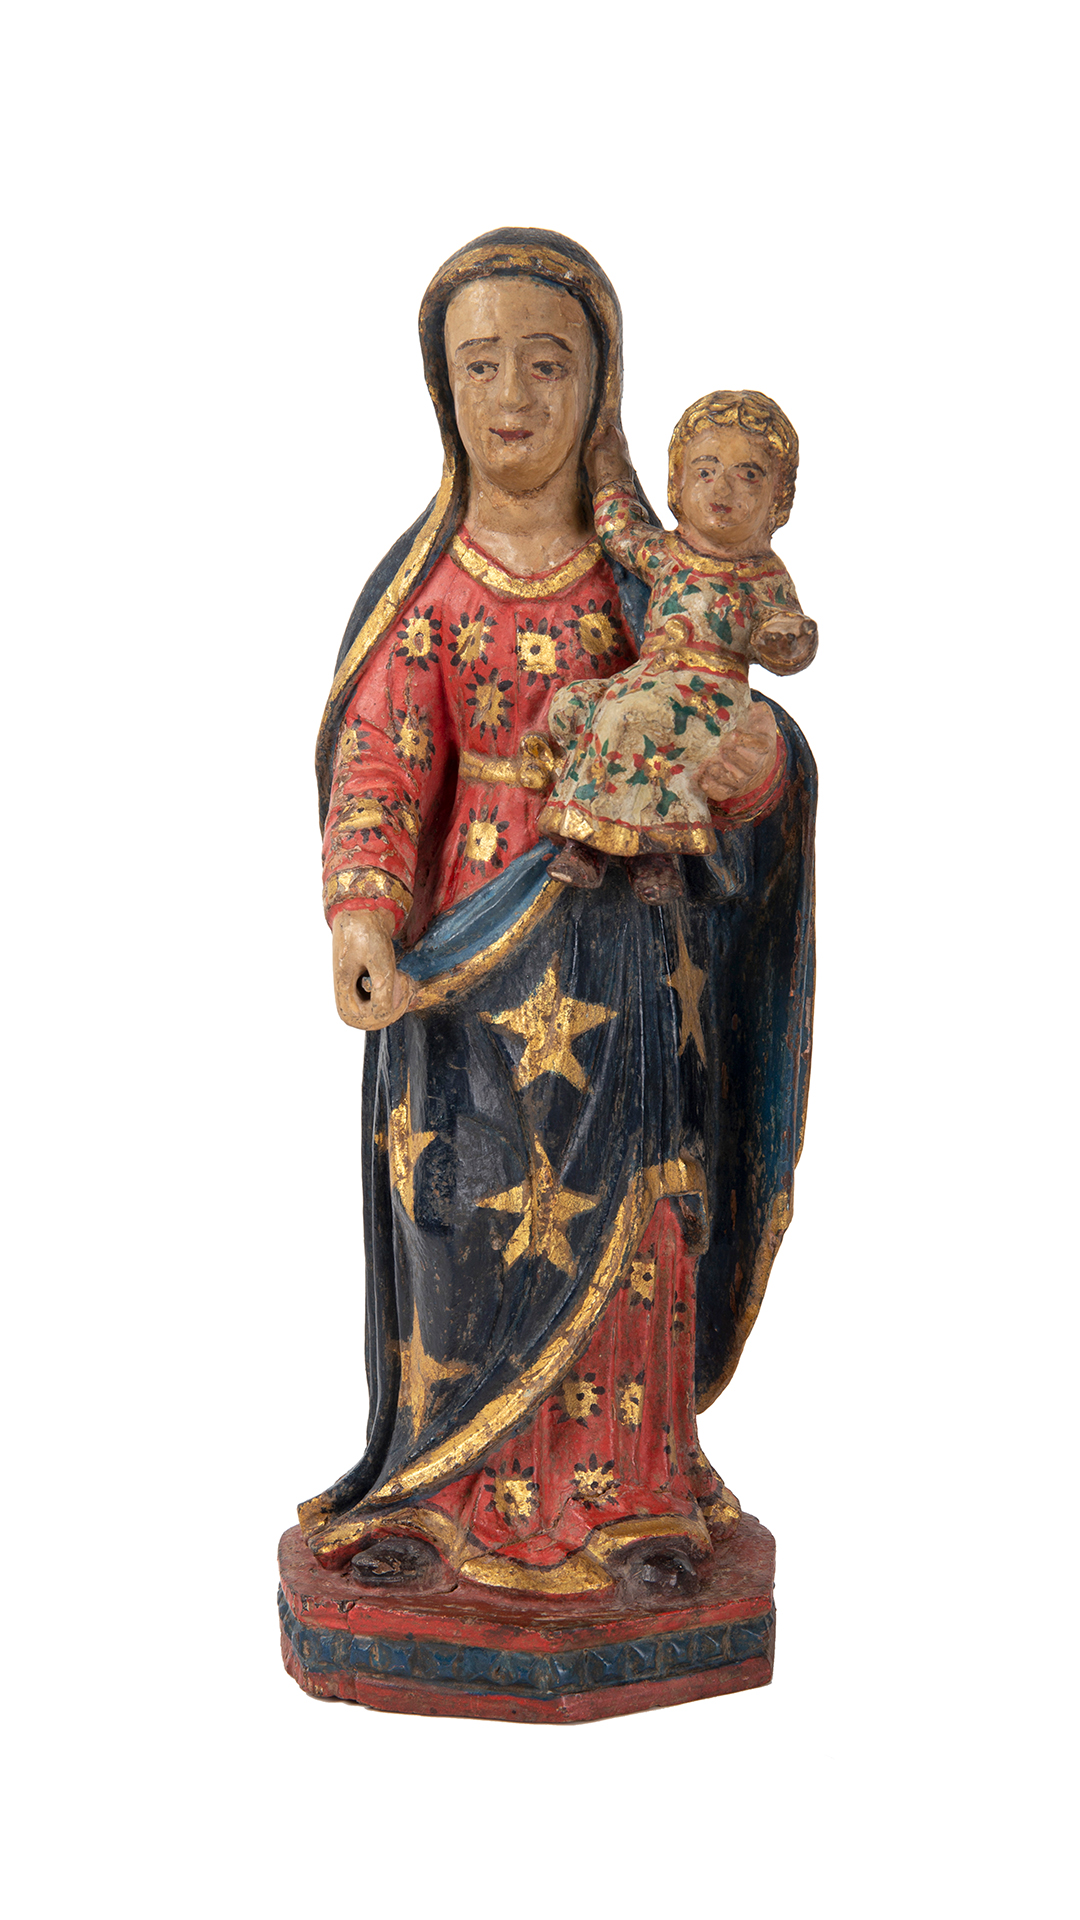

In [ ]:
image1

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Describe the exact contents of the image?"},
        ]
    }
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image1], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}

In [ ]:
start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024*1024)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 5.0331871509552
max memory allocated: 10412544000.0
number of tokens generated: 17
['User: Describe the exact contents of the image? \nAssistant: In this image we can see a sculpture of a woman and a child.']


In [ ]:
image2 = load_image("https://csmvs.in/wp-content/uploads/2022/06/22.1842-1.jpg")

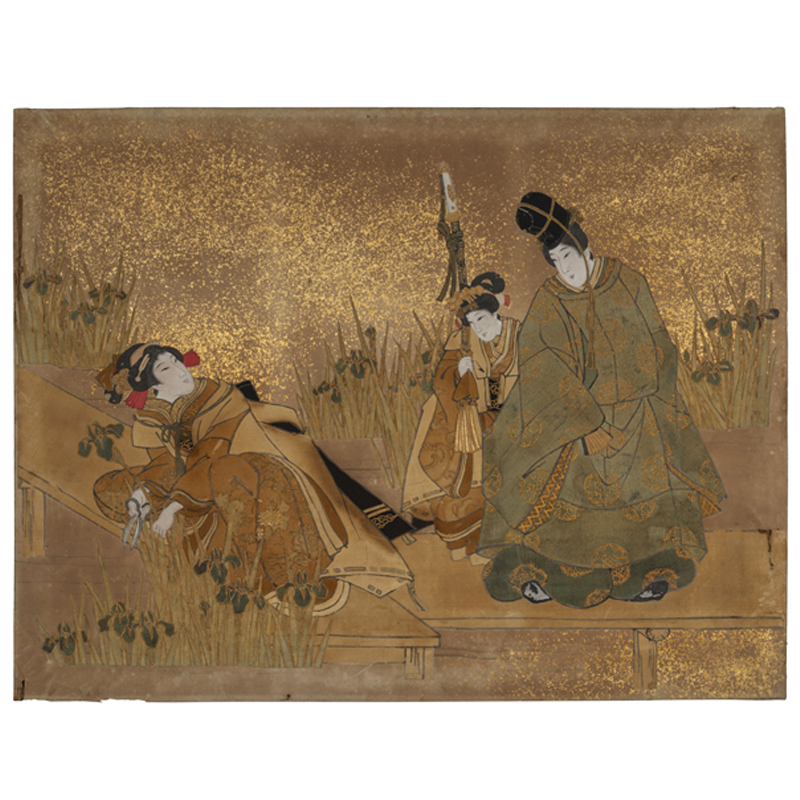

In [ ]:
image2

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Describe the exact contents of the image?"},
        ]
    }
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image2], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}

In [ ]:
torch.cuda.reset_peak_memory_stats()

In [ ]:
start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024*1024)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 2.452363967895508
max memory allocated: 6701474304.0
number of tokens generated: 10
['User: Describe the exact contents of the image? \nAssistant: In this image we can see a painting.']


In [ ]:
torch.cuda.empty_cache()

In [ ]:
start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024*1024)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 6.604036092758179
max memory allocated: 12482104320.0
number of tokens generated: 10
['User: Describe the exact contents of the image in exact detail? \nAssistant: In this image we can see a painting.']


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Tell me about Chatrapti Shivaji Maharaj?"},
        ]
    }
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}



start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024*1024)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 10.85391902923584
max memory allocated: 12482104320.0
number of tokens generated: 141
['User: Tell me about Chatrapti Shivaji Maharaj? \nAssistant: Chatrapati Shivaji Maharaj was a Maratha warrior and the founder of the Maratha Empire. He was born in 1630 in the village of Poona (now Pune) in the Deccan Plateau. Shivaji was a skilled warrior and a brilliant strategist. He fought against the Mughal Empire and the Portuguese Empire to establish the Maratha Empire. Shivaji was crowned as the Chhatrapati (emperor) of the Maratha Empire in 1674. He was a great leader who fought for the freedom of his people and established a strong and powerful empire.']


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Describe the image?"},
        ]
    }
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image2], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}


start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024*1024)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 2.4839835166931152
max memory allocated: 6714243584.0
number of tokens generated: 13
['User: Describe the image? \nAssistant: In this image we can see a painting of three women.']


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Describe the image and what are they doing?"},
        ]
    }
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image2], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}


start = time.time()
generated_ids = model.generate(**inputs, max_new_tokens=500)

print("time for generations:", (time.time() - start))
print("max memory allocated:", (torch.cuda.max_memory_allocated())/1024**10)
print("number of tokens generated:", len(generated_ids[:, inputs["input_ids"].size(1):][0]))
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

time for generations: 3.4200761318206787
max memory allocated: 5.2966365832912885e-21
number of tokens generated: 19
['User: Describe the image and what are they doing? \nAssistant: In this image we can see a painting. In the painting we can see three women.']


### **Clear GPU Mem**

In [ ]:
import numba
from numba import cuda
device = cuda.get_current_device()
device.reset()

### **Restart Collab runtime**

In [ ]:
import os
os.kill(os.getpid(), 9)